## Exercice 1: dimensionnement de la hauteur de porte d'un autobus

Les contraintes de structure de l'autobus imposent de choisir la hauteur des portes aussi petite que possible. La société commanditaire des autobus souhaite que la proportion des personnes qui sont obligées de courber la tête (au risque de se cogner le front) pour passer la porte soit de 0,1%. Le constructeur de l'autobus préfèrerait que cette proportion soit plutôt de 1%.
Le but du problème consiste à déterminer les valeurs correspondantes de la hauteur de porte, à partir de la distribution des tailles d'un échantillon d'environ 1000 personnes:

- Taille (mètres) :   1.5, 1.55 , 1.6 , 1.65 , 1.7 , 1.75 , 1.8 , 1.85 ,  1.9 , 1.95 , 2.0 , 2.05 , 2.1 , 2.15, 2.2,
- Nombre d'individus :  1,    7 ,  26 ,   71 , 120 ,  148 , 194 ,  143 , 120 ,   59 ,  21 ,  6 ,   0 , 1, 0
- Incertitude sur ce nombre :  1.5 ,  2.6, 5.1,  8.4, 11.0, 12.2, 13.9, 12.0, 11.0,  7.7, 4.6,  2.4,  1.,  1.5,   1.

1. Représenter graphiquement le nombre d'individus en fonction de la taille, ainsi que la barre d'erreur sur ce nombre. Pour chaque valeur de la taille listée dans le tableau, calculer le pourcentage d'individus strictement plus grands que cette taille.    


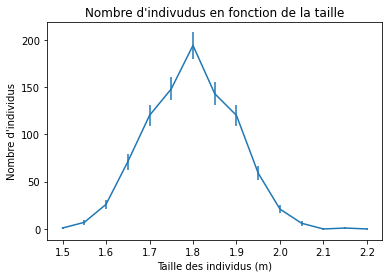

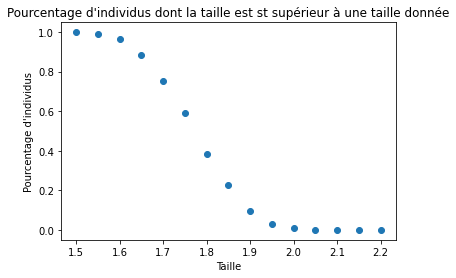

In [112]:
import numpy as np
import matplotlib.pyplot as plt

"""
Données
"""

taille = np.array([1.5, 1.55, 1.6, 1.65, 1.7, 1.75, 1.8, 1.85, 1.9, 1.95, 2.0, 2.05, 2.1, 2.15, 2.2])
nombre = np.array([1,7,26,71,120,148,194,143,120,59,21,6,0,1,0])
err_nombre = np.array([1.5,2.6,5.1,8.4,11.0,12.2,13.9,12.0,11.0,7.7,4.6,2.4,1.,1.5,1.])

"""
Fonction qui retounre le pourcentage de personnes dont la taille est supérieur à une taille donnée
"""

def sup(i):
    return np.sum(nombre[i+1:-1])/np.sum(nombre)
                                         
"""
Graphe représentant le nombre d'indivudus en fonction de la taille
"""
                                         
plt.plot(taille,nombre)
plt.errorbar(taille,nombre,yerr=err_nombre, fmt='none')
plt.xlabel("Taille des individus (m)")
plt.ylabel("Nombre d'individus")
plt.title("Nombre d'indivudus en fonction de la taille")
plt.show()

"""
Graphe représentant le pourcentage d'individus dont la taille est strictement supérieur à une taille donnée
"""

plt.scatter(taille,[sup(x) for x in range(len(taille))])
plt.ylabel("Pourcentage d'individus")
plt.xlabel("Taille")
plt.title("Pourcentage d'individus dont la taille est st supérieur à une taille donnée")
plt.show()

2. Sur la base de cet échantillon, pouvez-vous estimer à 5cm près la hauteur de porte telle que au moins 99% des individus passent cette porte sans se cogner ? Même question pour au moins 99,9% des individus ? A combien estimez-vous l'incertitude sur ces chiffres ?

In [2]:
"""
Liste contenant les valeurs des pourcentages calculés précedemment
"""

l = [sup(x) for x in range(len(taille))]


for i in range(len(l)):
    if l[i] <= 0.01:
        print("Pour une hauteur de la porte de %s plus ou moins %s m, au moins 99%% des individus \
n'auront pas à baisser la tête" % (taille[i],err_nombre[i]))
        break
for i in range(len(l)):
    if l[i] <= 0.001:
        print("Pour une hauteur de la porte de %s plus ou moins %s m, au moins 99,9%% des individus \
n'auront pas à baisser la tête" % (taille[i],err_nombre[i]))
        break

Pour une hauteur de la porte de 2.0 plus ou moins 4.6 m, au moins 99% des individus n'auront pas à baisser la tête
Pour une hauteur de la porte de 2.15 plus ou moins 1.5 m, au moins 99,9% des individus n'auront pas à baisser la tête


Pour obtenir une meilleure précision, on fait l'hypothèse que la distribution des tailles $t$ suit une loi de Gauss: 

$$f(t) = A e^{-\frac{t-t_{moy}}{2 \sigma^2} }$$ 

où $t_{moy}$ est la taille moyenne, $\sigma$ est l'écart type et $A$ une constante. 

La détermination des paramètres de cette loi de Gauss par ajustement utilise toutes les données disponibles, et pas uniquement le comptage des individus de très grande taille. Si l'hypothèse d'une loi de Gauss est correcte, alors cet ajustement permet de déterminer beaucoup plus précisément les proportions d'individus de très grande taille, et donc les hauteurs de porte qui conviennent.


3. Ajuster la distribution de taille précédente par une loi de Gauss : 
- donner la valeur des paramètres obtenus (taille moyenne, écart-type sur la taille, constante A) et l'incertitude sur ces paramètres. Vérifier que, lorsqu'on choisit ces valeurs des paramètres comme valeurs initiales de l'ajustement et qu'on refait tourner cet ajustement, on arrive bien au même résultat.
    
- calculer les résidus (écart, pour chaque valeur de taille, entre le nombre d'individus réel et le nombre d'individus prévu par la courbe ajustée).
- calculer le $\chi^2$ réduit et déterminer si l'ajustement est fiable.
- sur un graphique, représenter sous forme de points les données du tableau et sous forme de courbe la courbe ajustée.


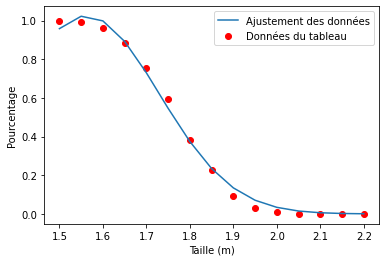

La valeur du chi2 réduit est de 0.9995193860563338 %, le modele est fiable.


In [41]:
from scipy.optimize import curve_fit
from scipy.integrate import quad

"""
Loi de Gauss
"""

def gauss(t,A,t_moy,sigma):
    return A*np.exp(-0.5*((t-t_moy)/sigma)**2)

"""
Ajustement des données
"""    

popt, pcov = curve_fit(gauss, taille, l)

"""
Graphe représentant les données et la courbe ajustée
"""

plt.plot(taille, gauss(taille,popt[0],popt[1],popt[2]), label = "Ajustement des données")
plt.scatter(taille, l, label = "Données du tableau", color = "r")
plt.xlabel("Taille (m)")
plt.ylabel("Pourcentage")
plt.legend()
plt.show()

"""
Calcul de chi carré réduit
"""

r1 = np.sum((l - gauss(taille,popt[0],popt[1],popt[2]))**2)
r2 = np.sum((l-popt[1])**2)
r2 = 1 - (r1/r2)
print("La valeur du chi2 réduit est de %s %%, le modele est fiable."%(r2))


4. Calculer l'intégrale $I$ de la fonction ajustée entre $-\infty$ et $+\infty$.

On rappelle que, lorsqu'on intègre une fonction $f(x, p_1, p_2, p_3)$ avec ```trapz```, alors l'intégration porte sur le premier argument (ici $x$), les autres arguments $p_1$,$p_2$ et $p_3$ étant traités comme des paramètres: ```I=integrate.trapz(f(x,p1,p2,p3),x)```.  




In [116]:
"""
Loi de Gauss avec les paramètres issues de curve_fit
"""

def gauss1(t):
    return gauss(t,popt[0],popt[1],popt[2])

"""
Calcul de l'integrale de gauss1 
"""
I = quad(gauss1,-np.inf,np.inf)
print("L'intégrale I vaut %s, précision : %s "%(I[0],I[1]))



L'intégrale I vaut 0.4316197942584419, précision : 7.723484907312051e-10 



5. En déduire la distribution de probabilité de taille des individus $p(t)=f(t)/I$ (de cette manière l'intégrale de $p(t)$ de ${-\infty}$ à ${+\infty}$ vaut 1). Représenter graphiquement $p(t)$, et vérifier que cette intégrale est effectivement égale à 1 avec une précision raisonnable.

In [117]:
"""
Distribution de probabilité de taille des individus
"""

def p(t):
    return gauss1(t)/I[0]

"""
Calcul de l'intégrale de p(t)
"""

I1 = quad(p,-np.inf,np.inf)
print("L'intégrale de p(t) vaut bien %s, précision : %s"%(I1[0],I[1]))

L'intégrale de p(t) vaut bien 1.0, précision : 7.723484907312051e-10



6. Pour des valeurs $t_{min}$ allant de 1.9m à 2.3m par pas de 0.02m, déterminer la fonction $P(t_{min})=\int^{+\infty}_{t_{min}} p(t) dt$, qui représente la probabilité que la taille d'un individu soit supérieure à $t_{min}$ . 

On créera un tableau contenant les valeurs de $t_{min}$ et un autre contenant les valeurs de $P(t_{min})$.
Représenter graphiquement  $P(t_{min})$ en fonction de $t_{min}$. On choisira une échelle logarithmique pour représenter $P(t_{min})$ (axe vertical).

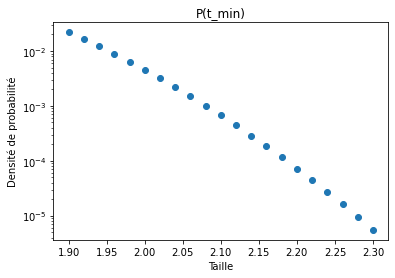

In [120]:
"""
Listes contenant les valeurs de t_min et de p(t_min)
"""

t = np.arange(1.9,2.32,0.02)
p_min = [quad(p,x,np.inf)[0] for x in t]

"""
Graphe de P(t_min)
"""

plt.scatter(t,p_min)
plt.yscale("log")
plt.xlabel("Taille")
plt.ylabel("Densité de probabilité")
plt.title("P(t_min)")
plt.show()


7. Déterminer les valeur de $t_{min}$ correspondant à $P(t_{min}) = 0.01$ et à $P(t_{min}) = 0.001$. Comparer aux estimations de la question 1.

**BONUS :** Pour effectuer une détermination précise de ces valeurs vous pouvez utiliser la fonction ```interp``` de ```numpy```. 
A partir d'un tableau de valeurs $t_{min}$ et du tableau correspondant $P(t_{min})$, elle permet de déterminer par interpolation quelle valeur de t correspond à une valeur donnée de $P$, si cette dernière n'est pas dans le tableau de valeurs $P(t_{min})$. Cette fonction prend en argument la valeur de $P$, en second argument le tableau des $P(t_{min})$ dans lequel on positionne $P$, et en troisième argument le tableau des $t_{min}$, duquel on extrait la valeur interpolée de $t_{min}$. Par ailleurs, il convient que les nombres du tableau $P(t_{min})$ soient parcourus dans l'ordre croissant, c'est à dire que l'indice de ce tableau doit aller de sa valeur la plus grande à 0 par pas de -1. Les lignes de code correspondantes sont les suivantes:

```t_pour_cent = np.interp(0.01, P[P.size:0:-1],t_min[P.size:0:-1])```

```t_pour_mille = np.interp(0.001, P[P.size:0:-1],t_min[P.size:0:-1])```

In [129]:
"""
Détermination de la taille telle que P(t_min) < 0.1 et P(t_min) < 0.01
"""

for i in range(len(p_min)):
    if p_min[i] <= 0.01:
        print("A partir d'une taille de %s m, P(t_min) < 0.01, à la question 1 \
nous avions %s m"%(t[i],2.0))
        break
for i in range(len(p_min)):
    if p_min[i] <= 0.001:
        print("A partir d'une taille de %s m, P(t_min) < 0.001, à la question 1 \
nous avions %s m"%(t[i],2.15))
        break

A partir d'une taille de 1.96 m, P(t_min) < 0.01, à la question 1 nous avions 2.0 m
A partir d'une taille de 2.1 m, P(t_min) < 0.001, à la question 1 nous avions 2.15 m


# Exercice 2 : intégration Monte-carlo

On souhaite calculer l'intégrale de la fonction $f$ suivante sur l'intervalle $[0,1]$.
$$ f(x)=x(1-x)\sin^2\left[200x  (1-x)\right] $$

1. Ecrire une fonction Python ```f(x)``` calculant la valeur de la fonction $f$ en $x$ puis tracer $f(x)$ sur l'intervalle d'intégration.

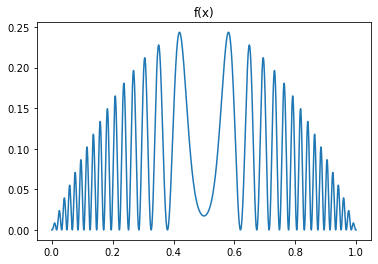

In [131]:
"""
Définition de la fonction f
"""
def f(x):
    return x*(1-x)*np.sin(200*x*(1-x))**2
"""
Graphe de f(x) sur l'intervalle [0,1]
"""
x = np.linspace(0,1,10000)
plt.plot(np.linspace(0,1,10000),f(x))
plt.title("f(x)")
plt.show()

La cellule suivante teste que vous avez bien répondu à la question en définissant une fonction appelée `f`. Pour s'en assurer exécutez la cellule, aucun message d'erreur ne doit apparaître.

In [137]:
assert 'f' in globals()  # teste l'existence de la variable moyenne
assert f(0) == 0

2. Quelle peut être la difficulté pour calculer l'intégrale d'une telle fonction ? 

La fonction f varie beaucoup et de manière brusque, les incertutides concernant l'estimation de son integrale sont assez grandes si nous ne considérons pas suffisamment de points.

Pour calculer cette intégrale on peut procéder de la manière suivante: 
- On tire au hasard les coordonnées $x$ et $y$ d'un point dans le domaine rectangulaire $0<x<1$ , $0<y<0.25$.
- On regarde si ce point appartient à la surface sous la courbe de la fonction $f$ (est-ce que $y<f(x)$ ?).
- On procède ainsi $N$ fois. Sur ces N points tirés au hasard, $N_{s}$ seront tombés sous la courbe. 
- On approche l'intégrale $I=\int_0^1 f(x)dx$ à partir de la proportion des points tombant sous la courbe: $I=\frac{N_{s}}{N}S_{tot}$ où $S_{tot}$ est la surface du domaine rectangulaire où peuvent tomber les points. 


3. Ecrire une fonction ```integraleMC(N)``` qui retourne une estimation de l'intégrale de $f$ sur l'intervalle $[0,1]$ grâce à la méthode que nous venons de décrire. $N$ est ici le nombre total de points tirés au hasard. 

In [93]:
"""
Fonction calculant l'integrale de f par la méthode Monte-Carlo
"""

def integraleMC(N):
    m = 0
    y = np.random.uniform(0,0.25,N)
    x1 = np.random.uniform(0,1,N)
    for i in range(len(x1)):
        if 0 < y[i] < f(x[i]):
            m+= 1
    return 0.25*(m)/N


0.0805


(0.08049771833469424, 6.431519049498438e-11)

4. Estimer l'intégrale à l'aide de la fonction ```integraleMC(N)``` avec $N$=10, 100, 1000, 10000, 100000.

In [136]:
for i in range(1,5):
    print("Pour N = %s, l'intégrale vaut à peu près %s"%(10**i,integraleMC(10**i)))

Pour N = 10, l'intégrale vaut à peu près 0.0
Pour N = 100, l'intégrale vaut à peu près 0.0025
Pour N = 1000, l'intégrale vaut à peu près 0.02475
Pour N = 10000, l'intégrale vaut à peu près 0.080525


In [94]:
assert 'integraleMC' in globals()  # teste l'existence de la variable moyenne

## Lisibilité du code

Dans le barême du DM2, un point est donné si le code est lisible, clair et bien commenté.

## Fin du DM

A la fin du DM, cliquez sur le bouton *Validate* en haut de la fenêtre pour vérifier que toutes les variables ont été bien définies. S'il y a des messages d'erreurs liés à `raise NotImplementedError()` cela signifie juste que vous n'avez pas répondu à certaines questions, ou oublié de retirer cette ligne de votre réponse.

Pour soumettre votre DM, sauvegardez bien votre travail (icône disquette en haut à gauche), ouvrez un terminal et tapez:
```
methnum submit L1/DM2 LEGROUPE
```
Remplacez LEGROUPE par votre numéro de groupe (au choix, MP1, MP2, LDD-MP1, LDD-MP2, LDD-PC1, etc.). Vous pouvez soumettre votre DM autant de fois que vous voulez, les enseignants relèveront la dernière copie soumise avant la date limite. Vous pouvez vérifier le contenu envoyé en allant dans votre espace gitlab personnel sur [https://gitlab.u-psud.fr/](https://gitlab.u-psud.fr/)